In [30]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
def compSnapshotNLMandEPPA(NLMfile, EPPAfile, index=0, v=5e-3, cmap='seismic'):
    ds1 = Dataset(NLMfile)
    ds2 = Dataset(EPPAfile)
    
    p=1
    
    NLM1 = np.array(ds1.variables['NLmodel_EPCg'][index, :, :])
    NLM2 = np.array(ds1.variables['NLmodel2_EPCg'][index, :, :])
    
    NLM = NLM1+NLM2
    
    txUo = np.array(ds2.variables['tauxUo'][index, :, :])
    tyVo = np.array(ds2.variables['tauyVo'][index, :, :])
    tx = np.array(ds2.variables['taux'][index, :, :])
    ty = np.array(ds2.variables['tauy'][index, :, :])
    uo = np.array(ds2.variables['uo'][index, :, :])
    vo = np.array(ds2.variables['vo'][index, :, :])
    
    EPPA = txUo - tx*uo + tyVo - ty *vo
    
    fig, axes = plt.subplots(1,2,figsize=(10,4))
    ax = axes[0]
    pmesh = ax.pcolormesh(EPPA, vmin= -v , vmax=v, cmap=cmap)
    plt.colorbar(pmesh, ax=ax)
    ax.set_title(r'EP')
    
    ax = axes[1]
    pmesh = ax.pcolormesh(NLM, vmin= -v*p , vmax=v*p, cmap=cmap)
    plt.colorbar(pmesh, ax=ax)
    ax.set_title(r'$\widetilde{EP}$')

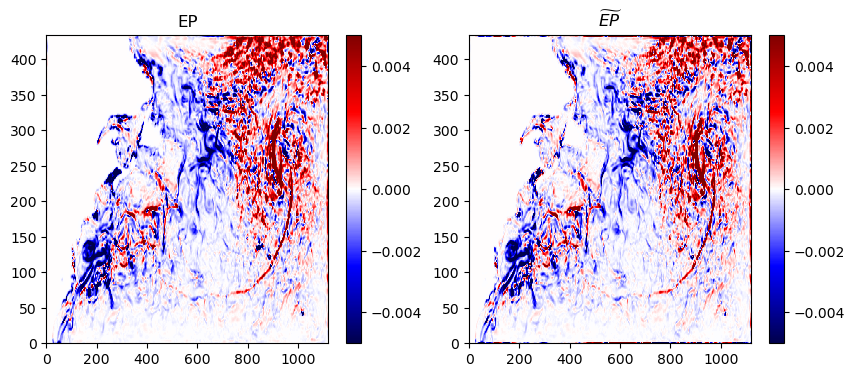

In [38]:
ell = 10
rootFolder = f'/pscratch/sd/s/srai/ROMSwithWRF/run/output/'
NLMfile = rootFolder + f'{ell:d}km/1to200/NLmodelEP_{ell:04d}km.nc'
EPPAfile = rootFolder + f'{ell:d}km/1to200/filtered_{ell:04d}.nc'

compSnapshotNLMandEPPA(NLMfile, EPPAfile)

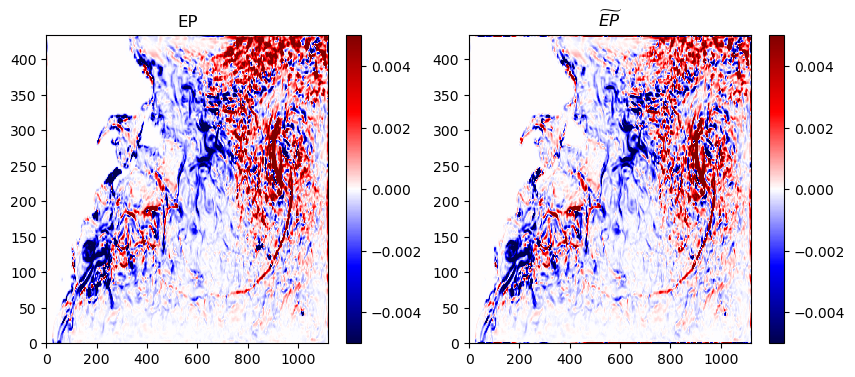

In [39]:
ell = 20
rootFolder = f'/pscratch/sd/s/srai/ROMSwithWRF/run/output/'
NLMfile = rootFolder + f'{ell:d}km/1to200/NLmodelEP_{ell:04d}km.nc'
EPPAfile = rootFolder + f'{ell:d}km/1to200/filtered_{ell:04d}.nc'

compSnapshotNLMandEPPA(NLMfile, EPPAfile)